In [1]:
# importing libraries and modules
import wrangle

import pandas as pd
import numpy as np

from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

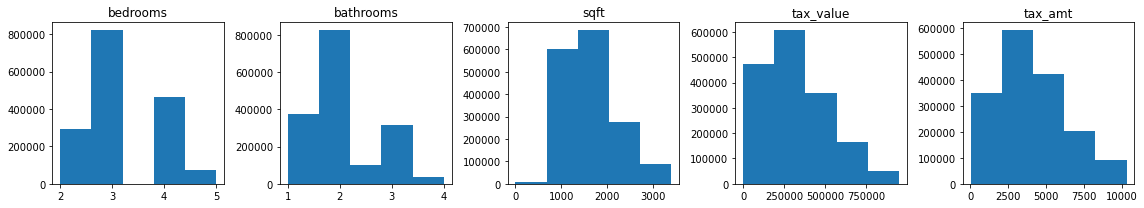

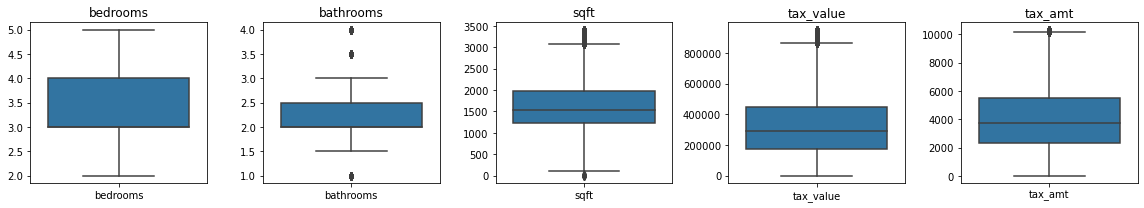

In [2]:
# acquiring prepared zillow data

train, validate, test = wrangle.wrangle_zillow()

# 1. Apply Scalers from Lesson to Data

In [3]:
# variable that holds the list of columns I want to scale
cols_to_scale = train.drop(columns = ['fips']).columns.to_list()
cols_to_scale

['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'tax_amt']

### Min - Max Scaler

In [4]:
# creating scaler object
mm_scaler = sklearn.preprocessing.MinMaxScaler()

In [5]:
# fitting scaler object to train dataset
mm_scaler = mm_scaler.fit(train[cols_to_scale])

In [6]:
# scaling data | train
mm_scaled_train = mm_scaler.transform(train[cols_to_scale])
# mm_scaled_train

# scaling data | validate
mm_scaled_validate = mm_scaler.transform(validate[cols_to_scale])
# mm_scaled_validate

# scaling data | test
mm_scaled_test = mm_scaler.transform(test[cols_to_scale])
# mm_scaled_test

In [7]:
# create new columns on train, validate, and test
mm_scaled_train = pd.DataFrame(mm_scaled_train, columns=cols_to_scale)
mm_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,0.333333,0.333333,0.405984,0.130229,0.450549,0.148722
1,0.666667,0.333333,0.459372,0.264531,0.340659,0.296314


#### Visualize Min - Max Scaler Results

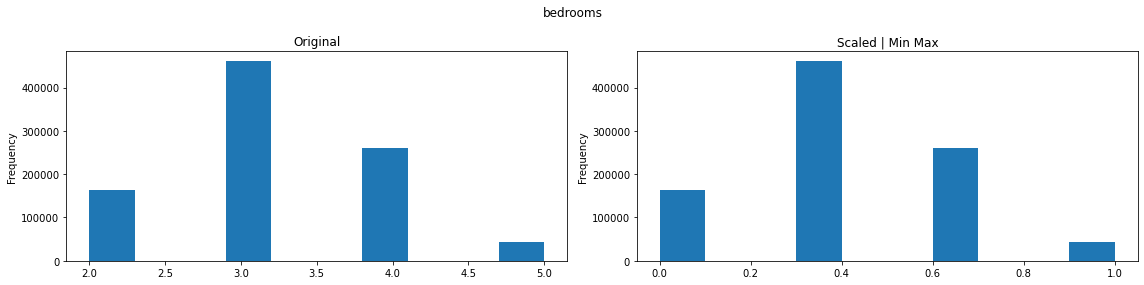

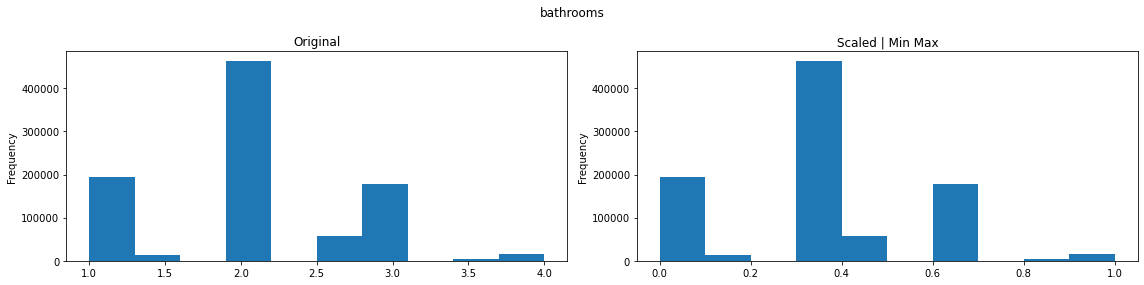

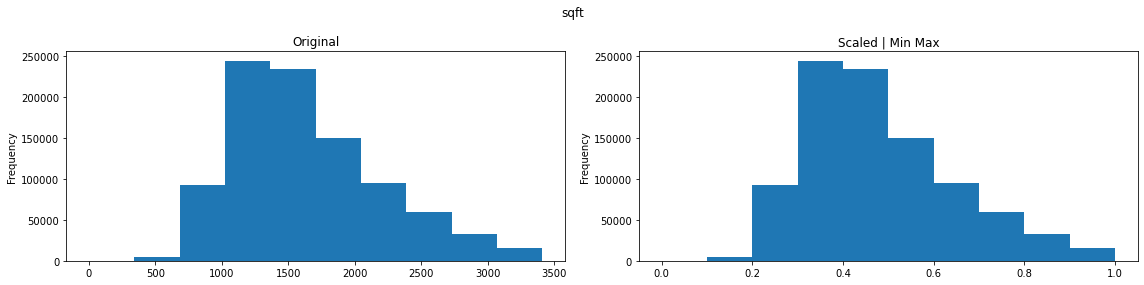

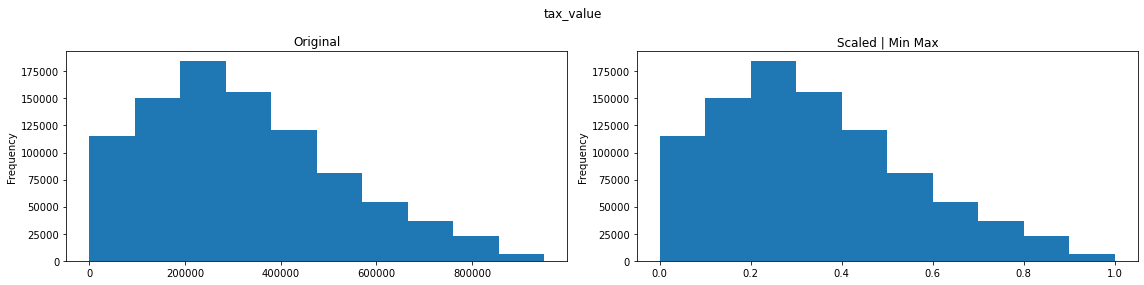

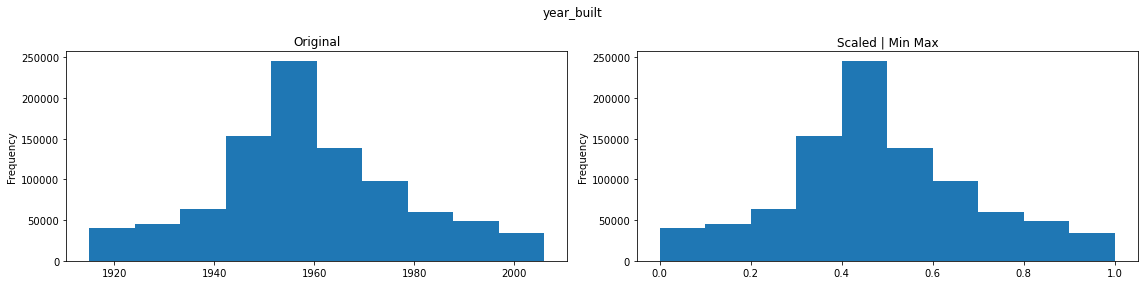

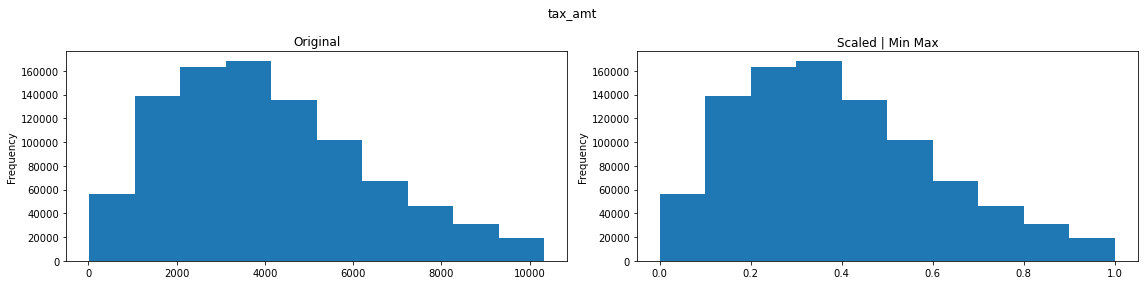

In [8]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    mm_scaled_train[col].plot.hist(title = 'Scaled | Min Max')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

### Standard Scaler

In [9]:
# creating scaler object
std_scaler = sklearn.preprocessing.StandardScaler()

In [10]:
# fitting scaler object to train dataset
std_scaler = std_scaler.fit(train[cols_to_scale])

In [11]:
# scaling data | train
std_scaled_train = std_scaler.transform(train[cols_to_scale])
# std_scaled_train

# scaling data | validate
std_scaled_validate =std_scaler.transform(validate[cols_to_scale])
# stdscaled_validate

# scaling data | test
std_scaled_test = std_scaler.transform(test[cols_to_scale])
# std_scaled_test

In [12]:
# create new columns on train, validate, and test
std_scaled_train = pd.DataFrame(std_scaled_train, columns=cols_to_scale)
std_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,-0.253196,-0.064991,-0.455481,-1.016402,-0.163234,-1.122852
1,1.035175,-0.064991,-0.129975,-0.371135,-0.697774,-0.441142


#### Visualize Standard Scaler Results

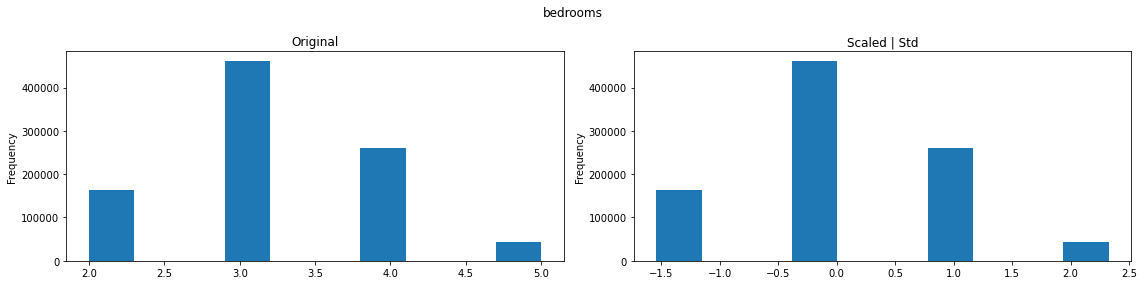

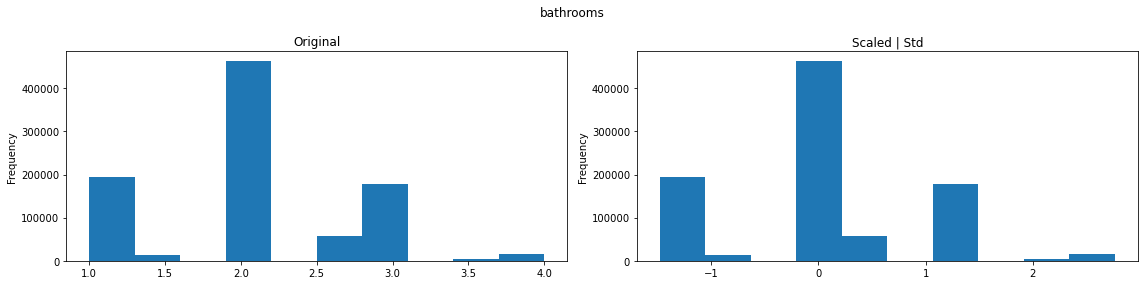

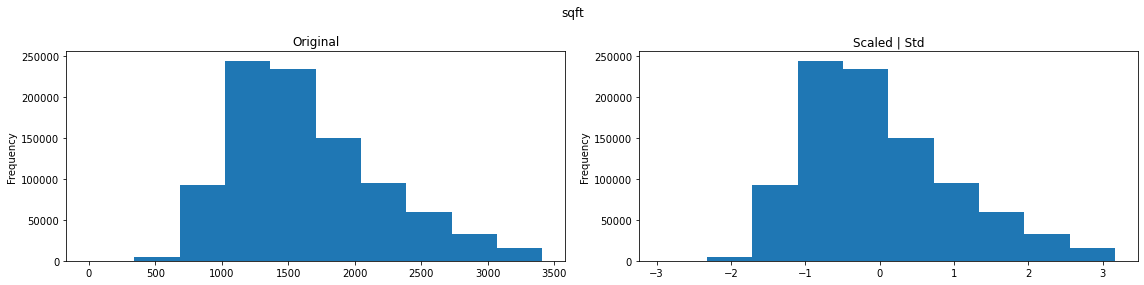

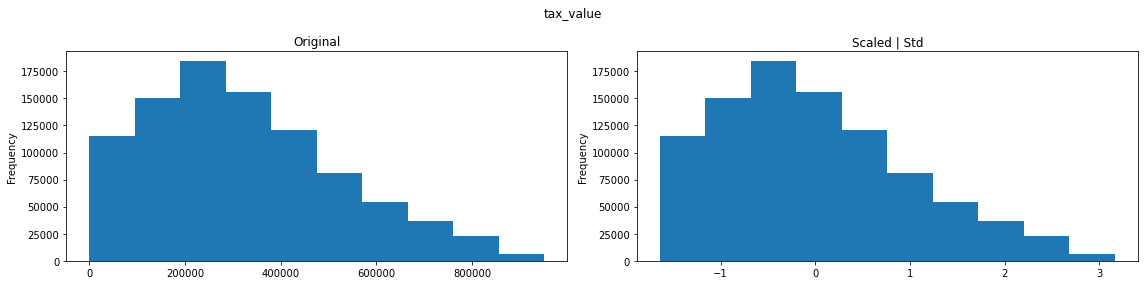

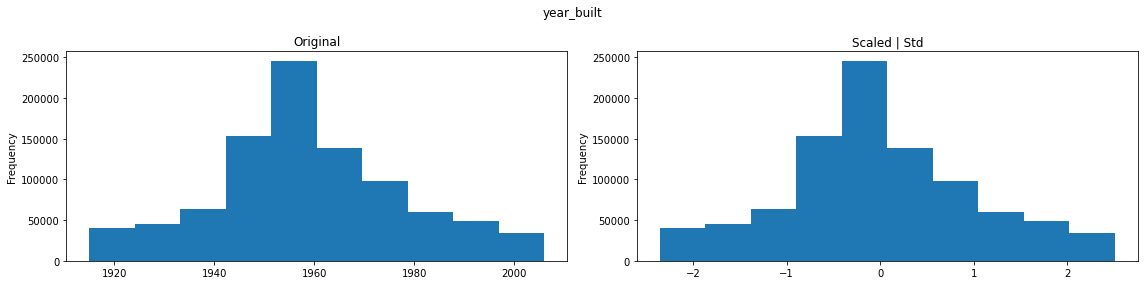

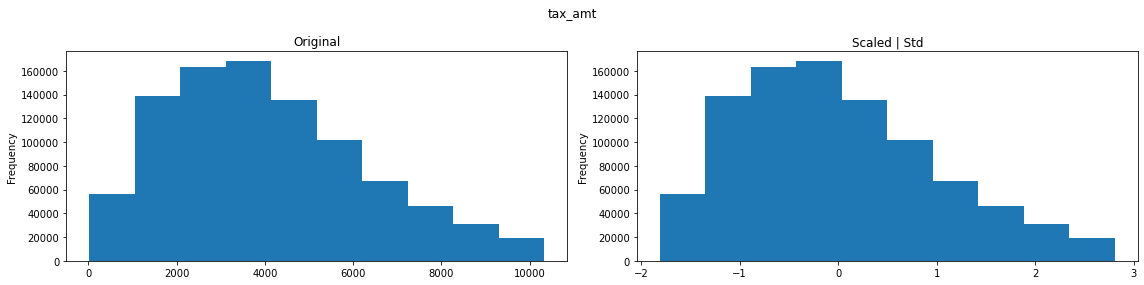

In [13]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    std_scaled_train[col].plot.hist(title = 'Scaled | Std')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

### Robust Scaler

In [14]:
ro_scaler = sklearn.preprocessing.RobustScaler()

In [15]:
# fitting scaler object to train dataset
ro_scaler = ro_scaler.fit(train[cols_to_scale])

In [16]:
# scaling data | train
ro_scaled_train = ro_scaler.transform(train[cols_to_scale])
# ro_scaled_train

# scaling data | validate
ro_scaled_validate = ro_scaler.transform(validate[cols_to_scale])
# ro_scaled_validate

# scaling data | test
ro_scaled_test = ro_scaler.transform(test[cols_to_scale])
# ro_scaled_test

In [17]:
# create new columns on train, validate, and test
ro_scaled_train = pd.DataFrame(ro_scaled_train, columns=cols_to_scale)
ro_scaled_train.head(2)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,0.0,0.0,-0.199192,-0.610767,0.000000,-0.698768
1,1.0,0.0,0.045760,-0.149877,-0.454545,-0.210492


#### Visualize Robust Scaler Results

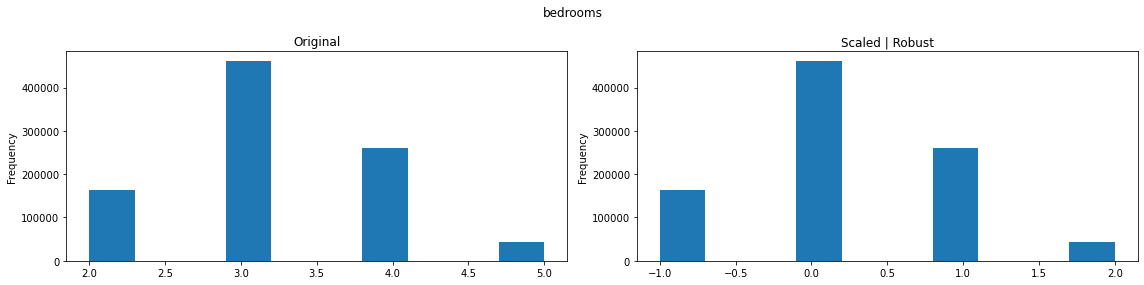

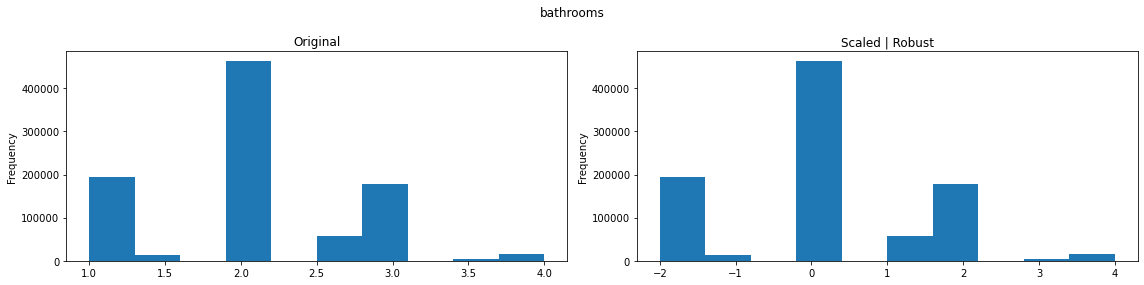

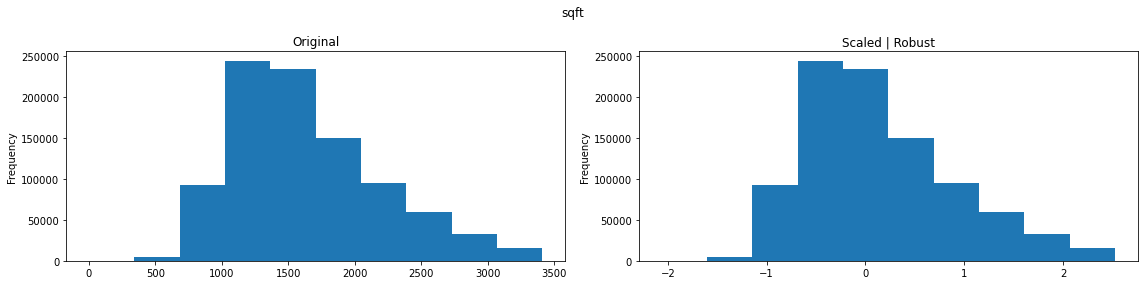

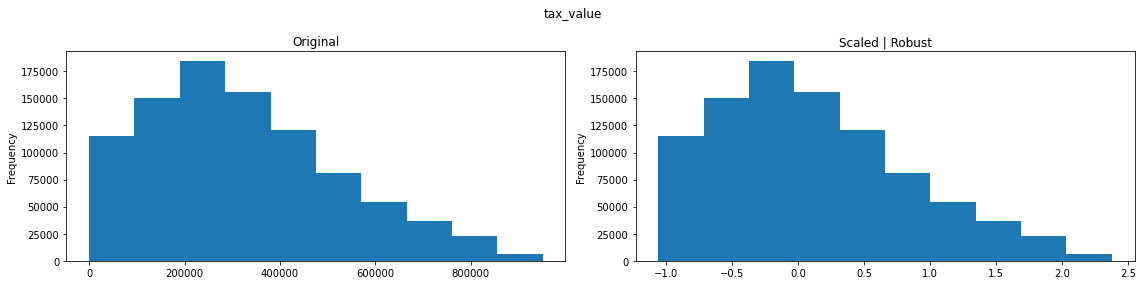

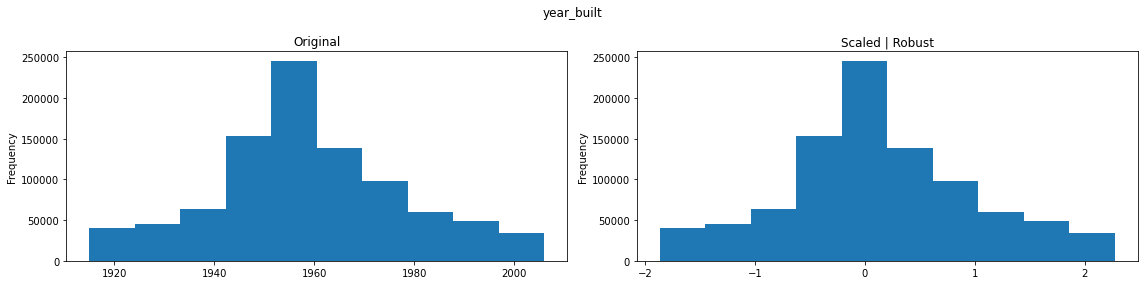

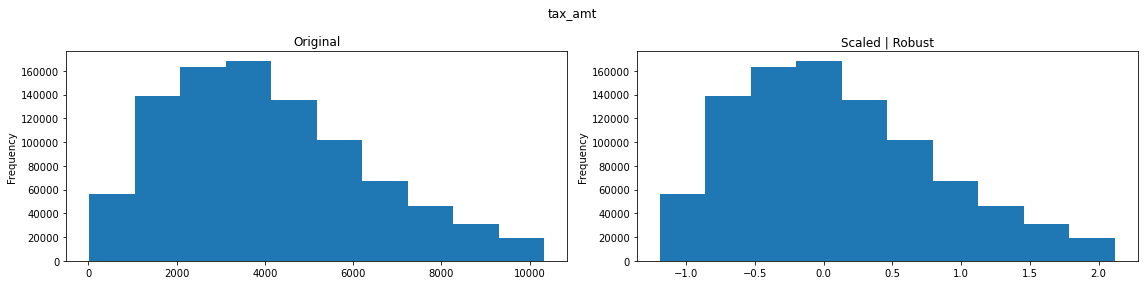

In [18]:
for col in cols_to_scale:

    plt.figure(figsize = (16, 4))
    # subplot 1
    plt.subplot(121)
    train[col].plot.hist(title = 'Original')
    
    # subplot 2
    plt.subplot(122)
    ro_scaled_train[col].plot.hist(title = 'Scaled | Robust')
    
    plt.suptitle(col)
    plt.tight_layout()
    plt.show()

# 2. Apply the inverse_transform method to scaled data.
>Is the resulting data the same as original?

## Min Max Scaler

In [19]:
# train
mm_train_inverse = pd.DataFrame(mm_scaler.inverse_transform(pd.DataFrame(mm_scaled_train)), columns = cols_to_scale)
mm_train_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,2.0,1385.0,123859.0,1956.0,1553.44
1,4.0,2.0,1567.0,251569.0,1946.0,3074.99
2,4.0,2.0,1910.0,762153.0,1958.0,8578.06
3,3.0,2.0,2042.0,751716.0,1936.0,9122.39
4,3.0,2.0,1502.0,351732.0,1956.0,4343.63


In [20]:
# validate
mm_validate_inverse = pd.DataFrame(mm_scaler.inverse_transform(pd.DataFrame(mm_scaled_validate)), columns = cols_to_scale)
mm_validate_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2949.0,593564.0,1993.0,6406.26
1,3.0,2.0,1102.0,189062.0,1944.0,2567.35
2,4.0,2.5,2097.0,386231.0,1962.0,4511.72
3,4.0,1.0,1689.0,225399.0,1922.0,2782.42
4,3.0,2.0,1680.0,91305.0,1946.0,1607.82


In [21]:
# test
mm_test_inverse = pd.DataFrame(mm_scaler.inverse_transform(pd.DataFrame(mm_scaled_test)), columns = cols_to_scale)
mm_test_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2104.0,579005.0,1995.0,6904.28
1,3.0,2.0,2423.0,226849.0,1929.0,2802.27
2,2.0,1.0,884.0,447061.0,1924.0,5360.63
3,2.0,1.0,884.0,515100.0,1949.0,7137.10
4,4.0,3.0,1956.0,498711.0,1921.0,6252.67


## Standard Scaler

In [22]:
# train
std_train_inverse = pd.DataFrame(std_scaler.inverse_transform(pd.DataFrame(std_scaled_train)), columns = cols_to_scale)
std_train_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,2.0,1385.0,123859.0,1956.0,1553.44
1,4.0,2.0,1567.0,251569.0,1946.0,3074.99
2,4.0,2.0,1910.0,762153.0,1958.0,8578.06
3,3.0,2.0,2042.0,751716.0,1936.0,9122.39
4,3.0,2.0,1502.0,351732.0,1956.0,4343.63


In [23]:
# validate
std_validate_inverse = pd.DataFrame(std_scaler.inverse_transform(pd.DataFrame(std_scaled_validate)), columns = cols_to_scale)
std_validate_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2949.0,593564.0,1993.0,6406.26
1,3.0,2.0,1102.0,189062.0,1944.0,2567.35
2,4.0,2.5,2097.0,386231.0,1962.0,4511.72
3,4.0,1.0,1689.0,225399.0,1922.0,2782.42
4,3.0,2.0,1680.0,91305.0,1946.0,1607.82


In [24]:
# test
std_test_inverse = pd.DataFrame(std_scaler.inverse_transform(pd.DataFrame(std_scaled_test)), columns = cols_to_scale)
std_test_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2104.0,579005.0,1995.0,6904.28
1,3.0,2.0,2423.0,226849.0,1929.0,2802.27
2,2.0,1.0,884.0,447061.0,1924.0,5360.63
3,2.0,1.0,884.0,515100.0,1949.0,7137.10
4,4.0,3.0,1956.0,498711.0,1921.0,6252.67


## Robust Scaler

In [25]:
# train
ro_train_inverse = pd.DataFrame(ro_scaler.inverse_transform(pd.DataFrame(ro_scaled_train)), columns = cols_to_scale)
ro_train_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,2.0,1385.0,123859.0,1956.0,1553.44
1,4.0,2.0,1567.0,251569.0,1946.0,3074.99
2,4.0,2.0,1910.0,762153.0,1958.0,8578.06
3,3.0,2.0,2042.0,751716.0,1936.0,9122.39
4,3.0,2.0,1502.0,351732.0,1956.0,4343.63


In [26]:
# validate
ro_validate_inverse = pd.DataFrame(ro_scaler.inverse_transform(pd.DataFrame(ro_scaled_validate)), columns = cols_to_scale)
ro_validate_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2949.0,593564.0,1993.0,6406.26
1,3.0,2.0,1102.0,189062.0,1944.0,2567.35
2,4.0,2.5,2097.0,386231.0,1962.0,4511.72
3,4.0,1.0,1689.0,225399.0,1922.0,2782.42
4,3.0,2.0,1680.0,91305.0,1946.0,1607.82


In [27]:
# test
ro_test_inverse = pd.DataFrame(ro_scaler.inverse_transform(pd.DataFrame(ro_scaled_test)), columns = cols_to_scale)
ro_test_inverse.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amt
0,3.0,3.0,2104.0,579005.0,1995.0,6904.28
1,3.0,2.0,2423.0,226849.0,1929.0,2802.27
2,2.0,1.0,884.0,447061.0,1924.0,5360.63
3,2.0,1.0,884.0,515100.0,1949.0,7137.10
4,4.0,3.0,1956.0,498711.0,1921.0,6252.67


# 3. Read the documentation for sklearn's QuantileTransformer. 
>Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

This method transforms selected features so that they follow a <b>normal distribution</b>. For a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of marginal outlier. 
1. An estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. 
2. The obtained values are then mapped to the desired output distribution using the associated quantile function. 
3. Feature values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution.

##### Note: this transformation is non-linear and may distort  linear correlations between variables measured at the same scales but renders variables measured at different scales more directly comparable. 

In [28]:
from sklearn.preprocessing import QuantileTransformer

quant_train = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal'), 'Quantile Scaler', train, [cols_to_scale]
quant_train

(QuantileTransformer(output_distribution='normal'),
 'Quantile Scaler',
          bedrooms  bathrooms    sqft  tax_value  year_built  tax_amt    fips
 1462929       3.0        2.0  1385.0   123859.0      1956.0  1553.44  6059.0
 1842131       4.0        2.0  1567.0   251569.0      1946.0  3074.99  6037.0
 869730        4.0        2.0  1910.0   762153.0      1958.0  8578.06  6059.0
 1306110       3.0        2.0  2042.0   751716.0      1936.0  9122.39  6037.0
 431629        3.0        2.0  1502.0   351732.0      1956.0  4343.63  6037.0
 ...           ...        ...     ...        ...         ...      ...     ...
 1393020       4.0        3.0  2312.0   689673.0      1986.0  8415.98  6037.0
 2075566       4.0        1.5  1824.0    45427.0      1916.0   842.42  6059.0
 1215718       4.0        3.0  2633.0   452272.0      1989.0  4524.56  6059.0
 976859        3.0        1.0   995.0   201289.0      1945.0  2513.18  6059.0
 1932817       2.0        2.0  1228.0   159633.0      1945.0  2102.36 

# 5. Based on the work you've done, choose a scaling method for your dataset.
> Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each.

##### Be sure to only learn the parameters for scaling from your training data!

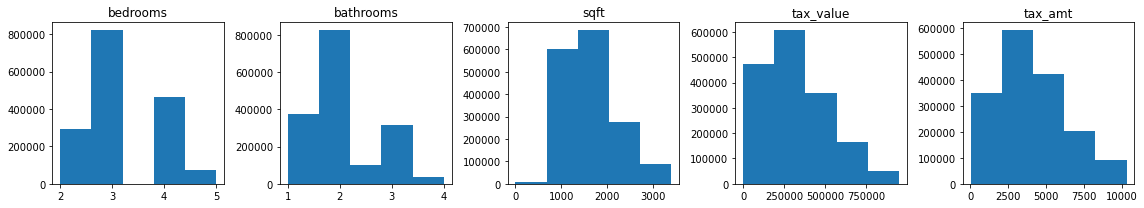

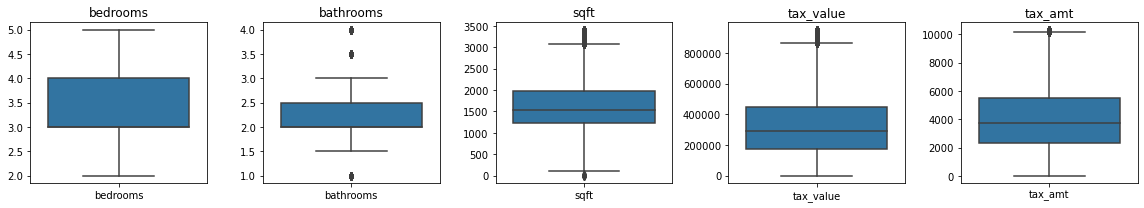

In [29]:
train, validate, test = wrangle.wrangle_zillow()

In [30]:
import prepare

In [31]:
prepare.scale_zillow(test, validate, train)

(array([[0.40598416, 0.13022889, 0.14872225],
        [0.45937225, 0.2645307 , 0.29631444],
        [0.55998827, 0.80146869, 0.83011887],
        ...,
        [0.77207392, 0.47559306, 0.43692448],
        [0.29158111, 0.21165547, 0.24181819],
        [0.3599296 , 0.16784938, 0.20196815]]),
 array([[0.86476973, 0.6241779 , 0.61945165],
        [0.32296861, 0.19879737, 0.24707275],
        [0.61484306, 0.40614333, 0.43567898],
        ...,
        [0.52361396, 0.14755005, 0.17624052],
        [0.34936932, 0.50370063, 0.55183211],
        [0.5024934 , 0.06811839, 0.10909144]]),
 array([[0.61689645, 0.60886743, 0.66776019],
        [0.71047228, 0.23853476, 0.26986027],
        [0.25902024, 0.47011309, 0.51802428],
        ...,
        [0.54326782, 0.5280613 , 0.53941111],
        [0.49809328, 0.48575797, 0.5446288 ],
        [0.3763567 , 0.59069657, 0.64852291]]))